## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 12-4, 1e-8, 1e-12]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f"%(regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=LEARNNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test),
                 shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s"%(regulizer_ratio)
    results[exp_name_tag] = {"train-loss" : train_loss,
                                         "valid-loss" : valid_loss,
                                         "train-acc" : train_acc,
                                         "valid-acc" : valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 119us/step - loss: 109461.8760 - acc: 0.0947 - val_loss: 56272.1721 - val_acc: 0.1145
Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 106761.7423 - acc: 0.0998 - val_loss: 60452.5866 - val_acc: 0.0999
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 106741.8422 - acc: 0.0996 - val_loss: 55003.1028 - val_acc: 0.1005
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 106775.0249 - acc: 0.0973 - val_loss: 61866.3846 - val_acc: 0.0978
Epoch 5/50
50000/50000 [==============================] - 6s 113us/step - loss: 106754.3166 - acc: 0.1018 - val_loss: 57516.6614 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 106750.6511 - acc: 0.1036 - val_loss: 57231.2835 - val_acc: 0.1047
Epoch 7/50
50000/50000 [==============================] - 6s 115us/s

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 120us/step - loss: 15.0714 - acc: 0.2720 - val_loss: 13.9449 - val_acc: 0.3416
Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 13.0126 - acc: 0.3554 - val_loss: 12.1257 - val_acc: 0.3661
Epoch 3/50
50000/50000 [==============================] - 6s 111us/step - loss: 11.3419 - acc: 0.3784 - val_loss: 10.5924 - val_acc: 0.3850
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 9.9297 - acc: 0.3933 - val_loss: 9.2973 - val_acc: 0.3960
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 8.7292 - acc: 0.4053 - val_loss: 8.1865 - val_acc: 0.4068
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 7.7078 - acc: 0.4110 - val_loss: 7.2499 - val_acc: 0.4125
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 6.8368 - acc: 0.4192 - val_loss: 6.4

50000/50000 [==============================] - 7s 134us/step - loss: 15.1023 - acc: 0.2669 - val_loss: 13.9743 - val_acc: 0.3376
Epoch 2/50
50000/50000 [==============================] - 6s 112us/step - loss: 13.0338 - acc: 0.3546 - val_loss: 12.1401 - val_acc: 0.3734
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 11.3592 - acc: 0.3785 - val_loss: 10.6042 - val_acc: 0.3941
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 9.9444 - acc: 0.3949 - val_loss: 9.3087 - val_acc: 0.3959
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 8.7424 - acc: 0.4039 - val_loss: 8.2072 - val_acc: 0.4076
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 7.7177 - acc: 0.4129 - val_loss: 7.2597 - val_acc: 0.4141
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 6.8444 - acc: 0.4194 - val_loss: 6.4504 - val_acc: 0.4233
Epoch 8/50
50000/50000 [===============

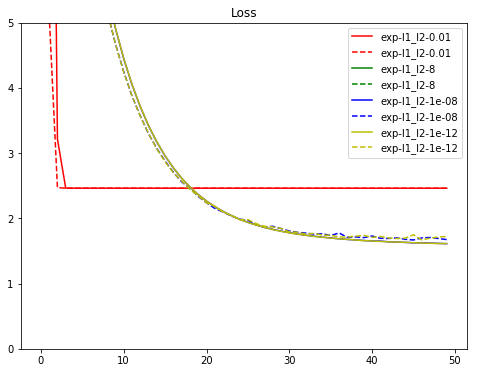

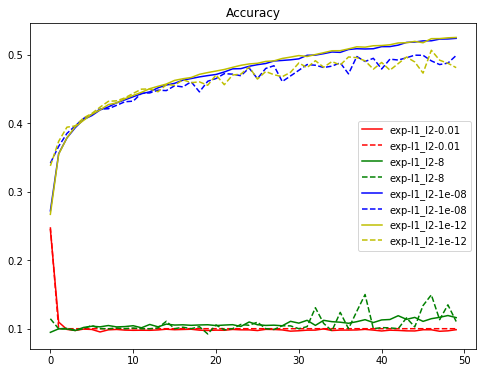

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()